# **Imports**

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from statsmodels.stats.proportion import proportions_ztest


# **Import data**

In [2]:
# upload the csv to your google drive and import from your google drive directory to save upload time
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/BT4012/Code submission/data_39.csv', engine='python', on_bad_lines='warn', encoding= "UTF-8")
print(len(data))

17599


In [4]:
# if the above doesnt work, import csv to colab and run this chunk
# data=pd.read_csv("data_39.csv", engine='python', on_bad_lines='warn')
# print(len(data))

# Functions

In [5]:
def plot_bar(Nfraud_df, fraud_df, col, end, decending):
  if decending: 
    figure, ax = plt.subplots(1, 2, figsize= (16, 16))

    sns.countplot(x = Nfraud_df[col], order = Nfraud_df.value_counts(col).iloc[:end].index, ax = ax[0])
    ax[0].set_title("Non Fruad " + col)
    ax[0].tick_params(axis='x', rotation= 90)

    sns.countplot(x = fraud_df[col], order = fraud_df.value_counts(col).iloc[:end].index, ax = ax[1])
    ax[1].set_title("Fraud " + col)
    ax[1].tick_params(axis='x', rotation= 90)
    plt.show()
  else:
    figure, ax = plt.subplots(1, 2, figsize= (16, 16))

    sns.countplot(x = Nfraud_df[col].sort_values(), ax = ax[0])
    ax[0].set_title("Non Fruad " + col)
    ax[0].tick_params(axis='x', rotation= 90)

    sns.countplot(x = fraud_df[col].sort_values(), ax = ax[1])
    ax[1].set_title("Fruad " + col)
    ax[1].tick_params(axis='x', rotation= 90)
    plt.show()


In [6]:
def get_df(df, col):
  df = pd.DataFrame(df[col].value_counts()).sort_values(by=col, ascending=False)
  df = df.reset_index(drop=False)
  df["Percentage"] = df[col] * 100 / df[col].sum()
  return df


In [7]:
# Function is to simply show values on the barplots
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.2f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.2f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

# **Data Exploration**

## **Data Overview**

In [8]:
data.head(1)

,title,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,...,company_profile_length,requirements_length,benefits_length,description_length,country,state,city,min_salary,max_salary,salary_specified
0,marketing intern,Marketing,food52 create groundbreaking award win cooking...,food52 fast grow james beard award win online ...,experience content management system major plu...,NaN,0,1,0,Other,...,141,115,0,124,US,NY,New York,0,0,0


### **Columns in Dataset**

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17599 entries, 0 to 17598
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   title                   17599 non-null  object
 1   department              6271 non-null   object
 2   company_profile         14317 non-null  object
 3   description             17597 non-null  object
 4   requirements            14944 non-null  object
 5   benefits                10480 non-null  object
 6   telecommuting           17599 non-null  int64 
 7   has_company_logo        17599 non-null  int64 
 8   has_questions           17599 non-null  int64 
 9   employment_type         14171 non-null  object
 10  required_experience     10637 non-null  object
 11  required_education      9590 non-null   object
 12  industry                12762 non-null  object
 13  function                11236 non-null  object
 14  fraudulent              17599 non-null  int64 
 15  co

### **Percentage of Null Value**

In [10]:
s = (data.isnull().sum()*100)/len(data)
s = s[s != 0]
s = pd.DataFrame(s)
s = s.reset_index()
s

,index,0
0,department,64.367294
1,company_profile,18.648787
2,description,0.011364
3,requirements,15.086084
4,benefits,40.451162
5,employment_type,19.478379
6,required_experience,39.559066
7,required_education,45.508268
8,industry,27.484516
9,function,36.155463


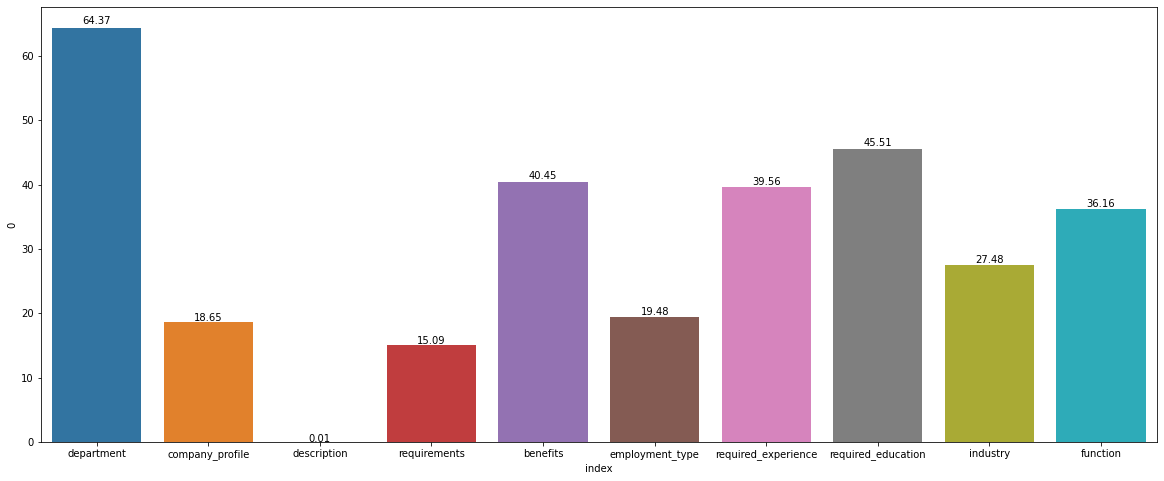

In [11]:
plt.figure(figsize=(20, 8))
ax = sns.barplot(data = s, x='index', y= 0, ci = None)
show_values(ax)

### **Fraudulent**

In [12]:
data.fraudulent.value_counts()

0    16743
1      856
Name: fraudulent, dtype: int64

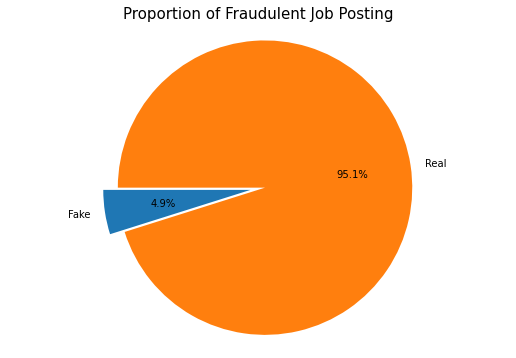

In [13]:
labels = 'Fake' ,'Real'

sizes = [data.fraudulent[data['fraudulent'] == 1].count() ,data.fraudulent[data['fraudulent'] == 0].count()]
explode =(0,0.1)

fig1 ,ax1 = plt.subplots(figsize =(9, 6))
ax1.pie(sizes ,explode =explode, labels =labels, autopct ='%1.1f%%',startangle =180)

ax1.axis('equal')
plt.title("Proportion of Fraudulent Job Posting" ,size = 15)
plt.show()

In [14]:
data.fraudulent.value_counts(normalize=True)

0    0.951361
1    0.048639
Name: fraudulent, dtype: float64

Approximately 95% of the job listed are real and 5% are fake. 

At the first look of the dataset, two things stand out. The first is highly imbalance of data, with the fraudulent class of job ads totaling less than 5% of all the records. So we may set the baseline of accuracy of the trained model at 95%, as this score can be achieved by simply labelling all ads as genuine. # (Think its better to say that we should look at precision rate)

Additionally, we observed that there is a wide spread of missing values in some features. For columns such as salary_range and departments, they have an exceptionally high percentage of missing data of more than 60%.


### **Word cloud for non_fraudulent jobs**

#### **Word cloud for non_fraudulent jobs**

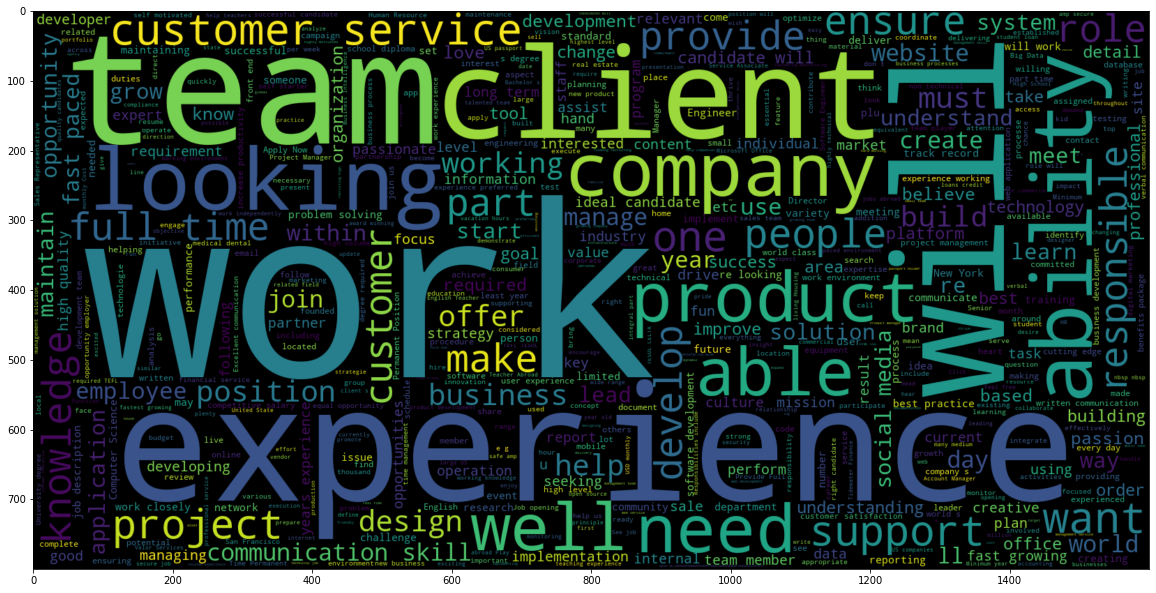

In [15]:
# word cloud for non_fraudulent jobs to see which words usually appear

plt.figure(figsize = (20,20)) # Text that is non_fraudulent
wc = WordCloud(width = 1600 , height = 800 , max_words = 1000).generate(" ".join(data[data.fraudulent == 0].combined_text))
plt.imshow(wc , interpolation = 'bilinear')

#### **Word cloud for fraudulent jobs**

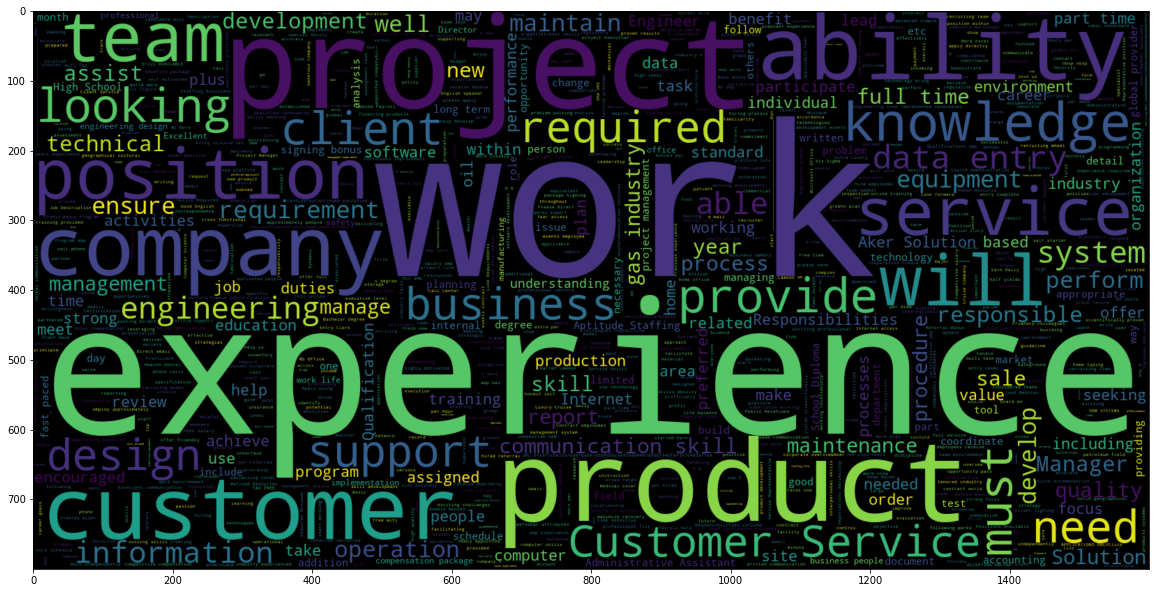

In [16]:
# word cloud for fraudulent jobs to see which words usually appear

plt.figure(figsize = (20,20)) # Text that is fraudulent(1)
wc = WordCloud(width = 1600 , height = 800 , max_words = 1000).generate(" ".join(data[data.fraudulent == 1].combined_text))
plt.imshow(wc , interpolation = 'bilinear')

Seems like both Fraudulent and Non-fraudulent posting uses customer services very commonly. 
Non-fraudulent postings value words like experience, full time and years while Fraudulent postings value words like commmunication skills and data entry.

### **Correlation**

#### **Correlation on Whole dataset**

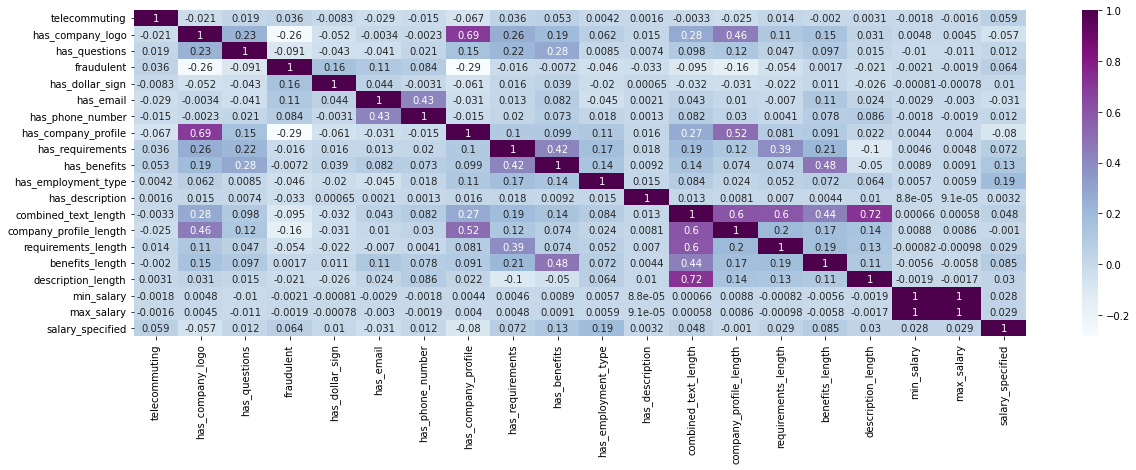

In [17]:
plt.figure(figsize=(20, 6))
sns.heatmap(data.corr(), annot=True, cmap="BuPu")

In [18]:
fraud_analysis = pd.DataFrame(data.corr()["fraudulent"])
fraud_analysis.sort_values(by = "fraudulent")

,fraudulent
has_company_profile,-0.285080
has_company_logo,-0.259868
company_profile_length,-0.157527
combined_text_length,-0.094657
has_questions,-0.090966
requirements_length,-0.053952
has_employment_type,-0.046199
has_description,-0.033339
description_length,-0.021422
has_requirements,-0.016405


#### **Correlation on Non-fraudulent job posting**

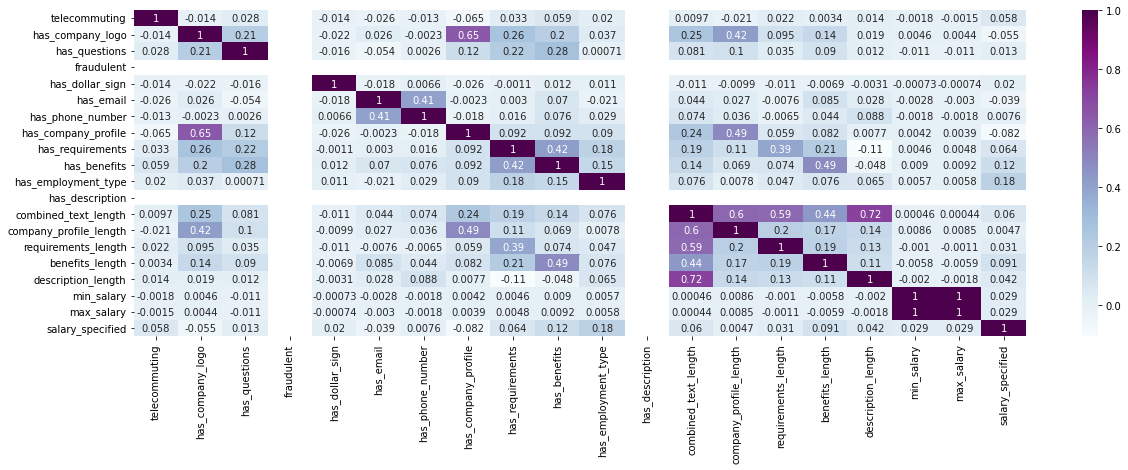

In [19]:
df1 = data[data['fraudulent'] == 0]
plt.figure(figsize=(20, 6))
sns.heatmap(df1.corr(), annot=True, cmap="BuPu")

#### **Correlation on Fraudulent Job posting**

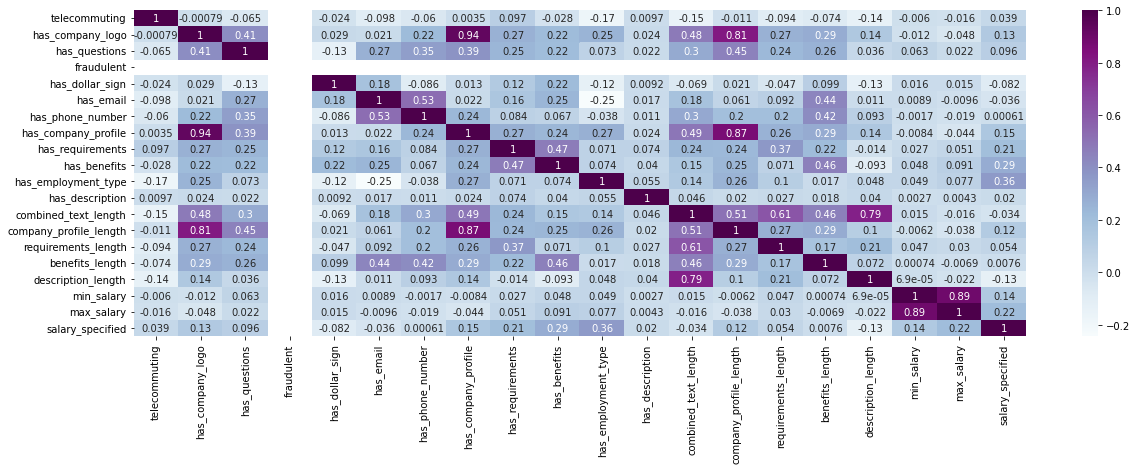

In [20]:
df2 = data[data['fraudulent'] == 1]
plt.figure(figsize=(20, 6))
sns.heatmap(df2.corr(), annot=True, cmap="BuPu")

From the 2 correlations graph above, the correlation for binary columns are very similar for both fraudualent and non-fraudulent job posting. Therefore, text columns need to be taken into consideration when determining the authenticity of the job posting. 

#### **Variables with correlation more than 0.5**

In [21]:
matrix = data.corr()
matrix = matrix.unstack()
matrix = matrix[abs(matrix) >= 0.5]
matrix = pd.DataFrame(matrix).reset_index()
matrix = matrix[matrix['level_0'] != matrix['level_1']]
matrix

,level_0,level_1,0
2,has_company_logo,has_company_profile,0.694669
8,has_company_profile,has_company_logo,0.694669
10,has_company_profile,company_profile_length,0.516509
16,combined_text_length,company_profile_length,0.599576
17,combined_text_length,requirements_length,0.595481
18,combined_text_length,description_length,0.722918
19,company_profile_length,has_company_profile,0.516509
20,company_profile_length,combined_text_length,0.599576
22,requirements_length,combined_text_length,0.595481
25,description_length,combined_text_length,0.722918


In [22]:
print("Non Fraud")
matrix1 = df1.corr()
matrix1 = matrix1.unstack()
matrix1 = matrix1[abs(matrix1) >= 0.5]
matrix1 = pd.DataFrame(matrix1).reset_index()
matrix1 = matrix1[matrix1['level_0'] != matrix1['level_1']]
matrix1

Non Fraud


,level_0,level_1,0
2,has_company_logo,has_company_profile,0.649503
7,has_company_profile,has_company_logo,0.649503
13,combined_text_length,company_profile_length,0.599020
14,combined_text_length,requirements_length,0.593261
15,combined_text_length,description_length,0.721173
16,company_profile_length,combined_text_length,0.599020
18,requirements_length,combined_text_length,0.593261
21,description_length,combined_text_length,0.721173
24,min_salary,max_salary,0.999393
25,max_salary,min_salary,0.999393


In [23]:
print("Fraud")
matrix2 = df2.corr()
matrix2 = matrix2.unstack()
matrix2 = matrix2[abs(matrix2) >= 0.5]
matrix2 = pd.DataFrame(matrix2).reset_index()
matrix2 = matrix2[matrix2['level_0'] != matrix2['level_1']]
matrix2

Fraud


,level_0,level_1,0
2,has_company_logo,has_company_profile,0.936315
3,has_company_logo,company_profile_length,0.813594
7,has_email,has_phone_number,0.525065
8,has_phone_number,has_email,0.525065
10,has_company_profile,has_company_logo,0.936315
12,has_company_profile,company_profile_length,0.868240
18,combined_text_length,company_profile_length,0.505560
19,combined_text_length,requirements_length,0.612937
20,combined_text_length,description_length,0.788778
21,company_profile_length,has_company_logo,0.813594


The correlation graphs for the binary values in both real and fake job posting are very similar. This implies that text columns might give us more confidence in determining the authenticity of the job posting.  

## **Relationships between fraudulent and various attributes**

From the correlation heatmap, we can observe that fradulent postings has a relatively high negative correlation with whether a posting has company logo.

In [24]:
# Filling empty values with 'na' for the sole purpose of data exploration and visualization. 
data_na = data.fillna('na')

In [25]:
# Split dataset into real and fake fraudulent cases for separate analysis
real = data_na[data_na.fraudulent == 0]
fake = data_na[data_na.fraudulent == 1]

### **Significance of Missing values**

In [26]:
na_rates=pd.DataFrame([col, len(real.loc[real[col]=='na'])/len(real[col]), len(fake.loc[fake[col]=='na'])/len(fake[col]) ] for col in data.columns)
na_rates.columns=['column', 'real_na_rates', 'fake_na_rates']

for col in data.columns:
    counts=np.array([len(real.loc[real[col]=='na']), len(fake.loc[fake[col]=='na'])])
    nobs=np.array([len(real[col]), len(fake[col])])
    if (counts.sum() !=0) and (nobs.sum() !=0):
        na_rates.loc[na_rates.column==col,'zstat'], na_rates.loc[na_rates.column==col,'p_value']=proportions_ztest(count=counts, nobs=nobs,  alternative='two-sided')


na_rates['significant_diff'] = na_rates['p_value'] < 0.05
na_rates[(na_rates.significant_diff == True) & (na_rates.fake_na_rates != 0)]


,column,real_na_rates,fake_na_rates,zstat,p_value,significant_diff
1,department,0.645285,0.612150,1.974423,4.833361e-02,True
2,company_profile,0.161381,0.677570,-37.819096,0.000000e+00,True
3,description,0.000000,0.002336,-6.254886,3.978051e-10,True
4,requirements,0.149555,0.176402,-2.140547,3.231055e-02,True
9,employment_type,0.190647,0.275701,-6.128753,8.857065e-10,True
10,required_experience,0.390312,0.498832,-6.333275,2.400114e-10,True
11,required_education,0.451831,0.518692,-3.831526,1.273510e-04,True
12,industry,0.272771,0.315421,-2.726262,6.405610e-03,True


We use z-test to determine if missing value contribute to fake job posting in certain columns. From the table above, missing values in `company_profile`, `description`, `employment_type`, `required_experience`, `required_education` and `industry` do have an influence on if the job posting is fake or real. 

### **Relationship between fraudulent cases and telecommuting**

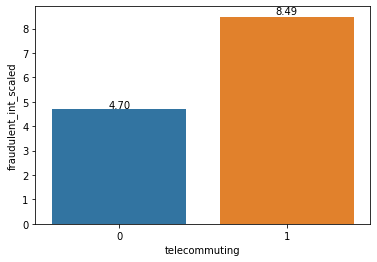

In [27]:
data_na['fraudulent_int_scaled'] = data_na['fraudulent'].astype('int') * 100
ax1 = sns.barplot(data = data_na, y = 'fraudulent_int_scaled', x = 'telecommuting', ci = None)
show_values(ax1)

8.34% of job ads with telecommuting are fraud, 4.69% of jobs ads that not telecommuting are fraud 

### **Relationship between fraudulent cases and company logo** 

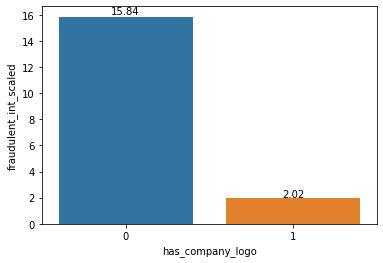

In [28]:
data_na['fraudulent_int_scaled'] = data_na['fraudulent'].astype('int') * 100
ax2 = sns.barplot(data = data_na, y = 'fraudulent_int_scaled', x = 'has_company_logo', ci = None)
show_values(ax2)

1.99% of job ads with company logos are fraud, 15.93% of job ads with no company logo are fraud. Absence of company logo is the most indicative, as there is a greater disparity of fraud cases between job ads with no company logos and job ads that has company logos.

### **Relationship between fraudulent cases and whether or not the job ads have questions or not** 

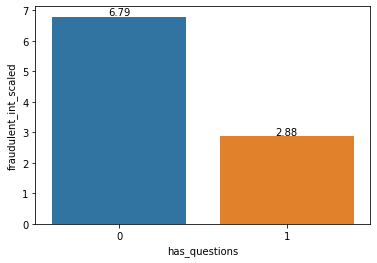

In [29]:
ax3 = sns.barplot(data = data_na, y = 'fraudulent_int_scaled', x = 'has_questions', ci = None)
show_values(ax3)


2.84% of job ads with questions are fraud, 6.78% of job ads without questions are fraud

### **Relationship between fraudulent cases and the employment type** 

In [30]:
data_na.employment_type.value_counts()

Full-time    11423
na            3428
Contract      1514
Part-time      772
Temporary      237
Other          225
Name: employment_type, dtype: int64

We can see the type of jobs and the amount of them present in the whole dataset, but we will dive deeper into the proportion of fraud cases in each employment type with the graph below

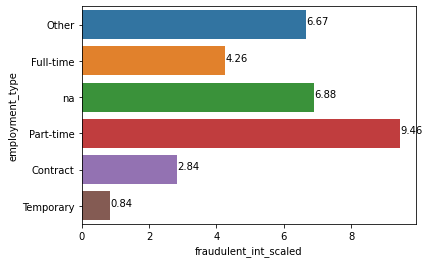

In [31]:
ax4 = sns.barplot(data=data_na, x='fraudulent_int_scaled', y='employment_type', ci = None)
show_values(ax4, "h", space = 0)

Job ads with employment type being empty (6.94% of jobs with no employment type) and part-time (9.28% of part-time jobs) are more likely to be fake as compared to other `employment_type`. 

### **Relationship between fraudulent cases and the required experience type** 

In [32]:
data_na.required_experience.value_counts()

na                  6962
Mid-Senior level    3768
Entry level         2637
Associate           2267
Not Applicable      1070
Director             383
Internship           372
Executive            140
Name: required_experience, dtype: int64

We can see the type of required experience and the amount of them present in the whole dataset, but we will dive deeper into the proportion of 
fraud cases in each required experience type with the graph below

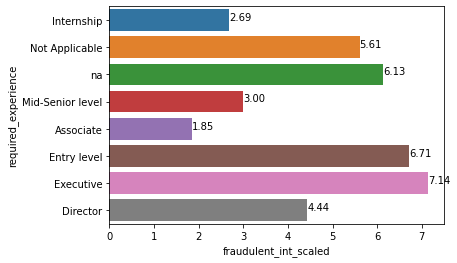

In [33]:
ax5 = sns.barplot(data=data_na, x='fraudulent_int_scaled', y='required_experience', ci = None)
show_values(ax5, "h", space = 0)

Job posting with required experience being not applicable, na, entry level, executive and director are more likely to be fake as compared to other category of experience.

### **Relationship between fraudulent cases and the required education type** 

In [34]:
data_na.required_education.value_counts()

na                                   8009
Bachelor's Degree                    5099
High School or equivalent            1989
Unspecified                          1369
Master's Degree                       416
Associate Degree                      264
Certification                         165
Some College Coursework Completed     100
Professional                           73
Vocational                             47
Some High School Coursework            27
Doctorate                              26
Vocational - HS Diploma                 9
Vocational - Degree                     6
Name: required_education, dtype: int64

We can see the type of required education and the amount of them present in the whole dataset, but we will dive deeper into the proportion of fraud cases in each required education type with the graph below

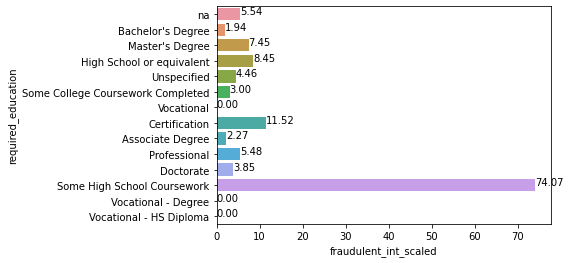

In [35]:
ax6 = sns.barplot(data=data_na, x='fraudulent_int_scaled', y='required_education', ci = None)
show_values(ax6, "h", space = 0)

All jobs have around the same low fradulent rates, with the exception of "some high school coursework", where the fradulent rate is 74.07%.

## **Relationship between Real job posting and Fradulent job posting** 

### **Title** 

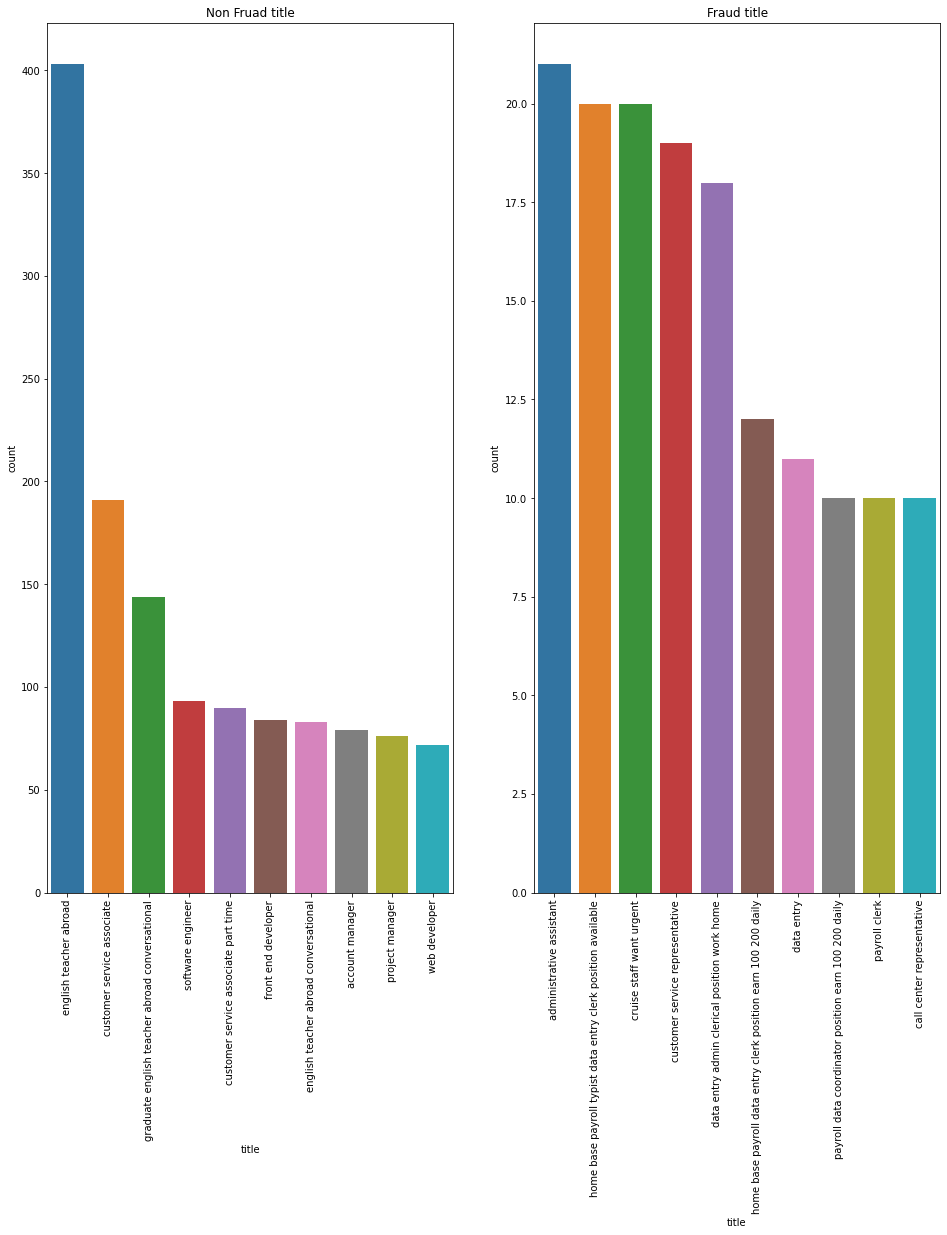

In [36]:
plot_bar(real, fake, "title", 10, True)

In [37]:
get_df(real, "title")[0:10]

,index,title,Percentage
0,english teacher abroad,403,2.406976
1,customer service associate,191,1.140775
2,graduate english teacher abroad conversational,144,0.860061
3,software engineer,93,0.555456
4,customer service associate part time,90,0.537538
5,front end developer,84,0.501702
6,english teacher abroad conversational,83,0.495730
7,account manager,79,0.471839
8,project manager,76,0.453921
9,web developer,72,0.430030


In [38]:
get_df(fake, "title")[0:10]

,index,title,Percentage
0,administrative assistant,21,2.453271
1,home base payroll typist data entry clerk posi...,20,2.336449
2,cruise staff want urgent,20,2.336449
3,customer service representative,19,2.219626
4,data entry admin clerical position work home,18,2.102804
5,home base payroll data entry clerk position ea...,12,1.401869
6,data entry,11,1.285047
7,network marketing,10,1.168224
8,payroll clerk,10,1.168224
9,account sale manager 80 130 000 yr,10,1.168224


Both real and fake job posting has vastly different top 10 title. Therefore `title` might play some importance in determining the authenticity of the job posting. 

### **Country** 

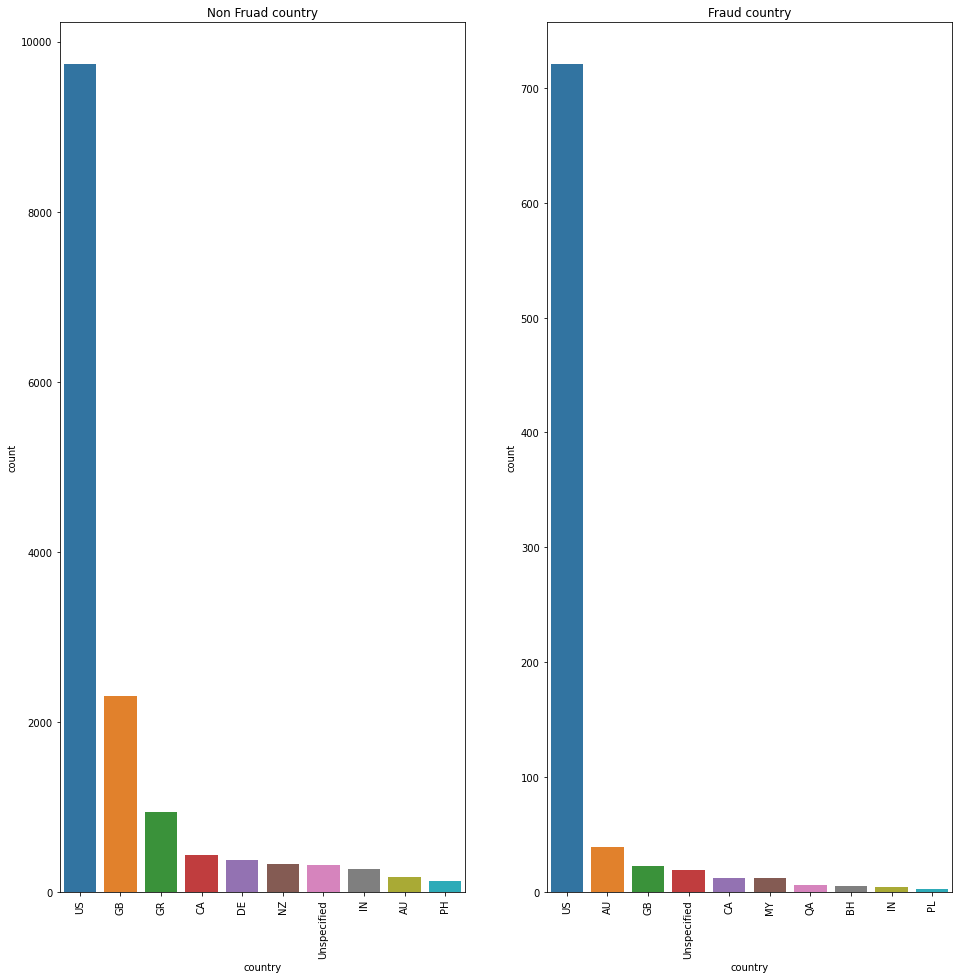

In [39]:
plot_bar(real, fake, "country", 10, True)

In [40]:
get_df(real, "country")[0:10]

,index,country,Percentage
0,US,9739,58.167592
1,GB,2306,13.772920
2,GR,938,5.602341
3,CA,438,2.616019
4,DE,382,2.281550
5,NZ,330,1.970973
6,Unspecified,322,1.923192
7,IN,269,1.606642
8,AU,174,1.039240
9,PH,131,0.782417


In [41]:
get_df(fake, "country")[0:10]

,index,country,Percentage
0,US,721,84.228972
1,AU,39,4.556075
2,GB,23,2.686916
3,Unspecified,19,2.219626
4,MY,12,1.401869
5,CA,12,1.401869
6,QA,6,0.700935
7,BH,5,0.584112
8,IN,4,0.467290
9,PL,3,0.350467


US takes up the highest percentage for both real and fake job posting. Some of the countries that come after US are similar between real and fake job posting.

### **State** 

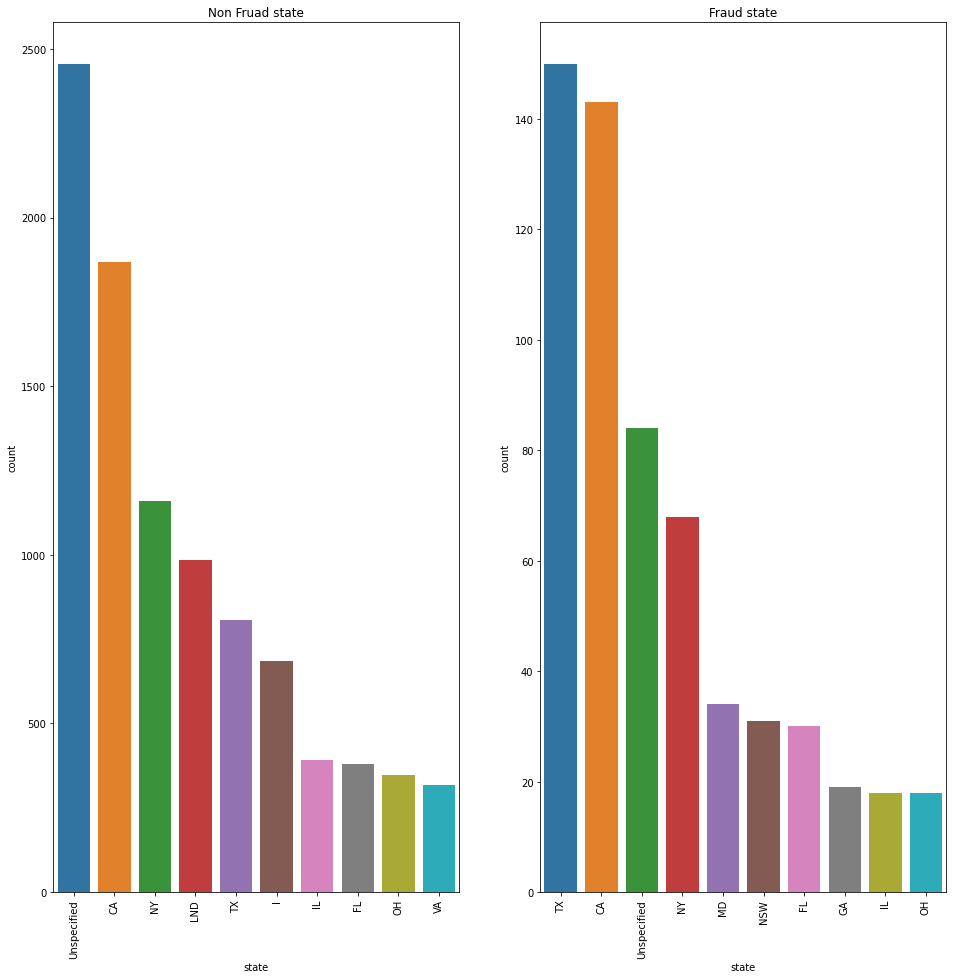

In [42]:
plot_bar(real, fake, "state", 10, True)

In [43]:
get_df(real, "state")[0:10]

,index,state,Percentage
0,Unspecified,2456,14.668817
1,CA,1869,11.162874
2,NY,1160,6.928269
3,LND,985,5.883056
4,TX,807,4.819925
5,I,686,4.097235
6,IL,393,2.347250
7,FL,380,2.269605
8,OH,347,2.072508
9,VA,317,1.893329


In [44]:
get_df(fake, "state")[0:10]

,index,state,Percentage
0,TX,150,17.523364
1,CA,143,16.705607
2,Unspecified,84,9.813084
3,NY,68,7.943925
4,MD,34,3.971963
5,NSW,31,3.621495
6,FL,30,3.504673
7,GA,19,2.219626
8,IL,18,2.102804
9,OH,18,2.102804


Real job posting has the highest percentage of unspecified state. Some of the countries that come after unspecified and TX are similar between real and fake job posting.

### **City** 

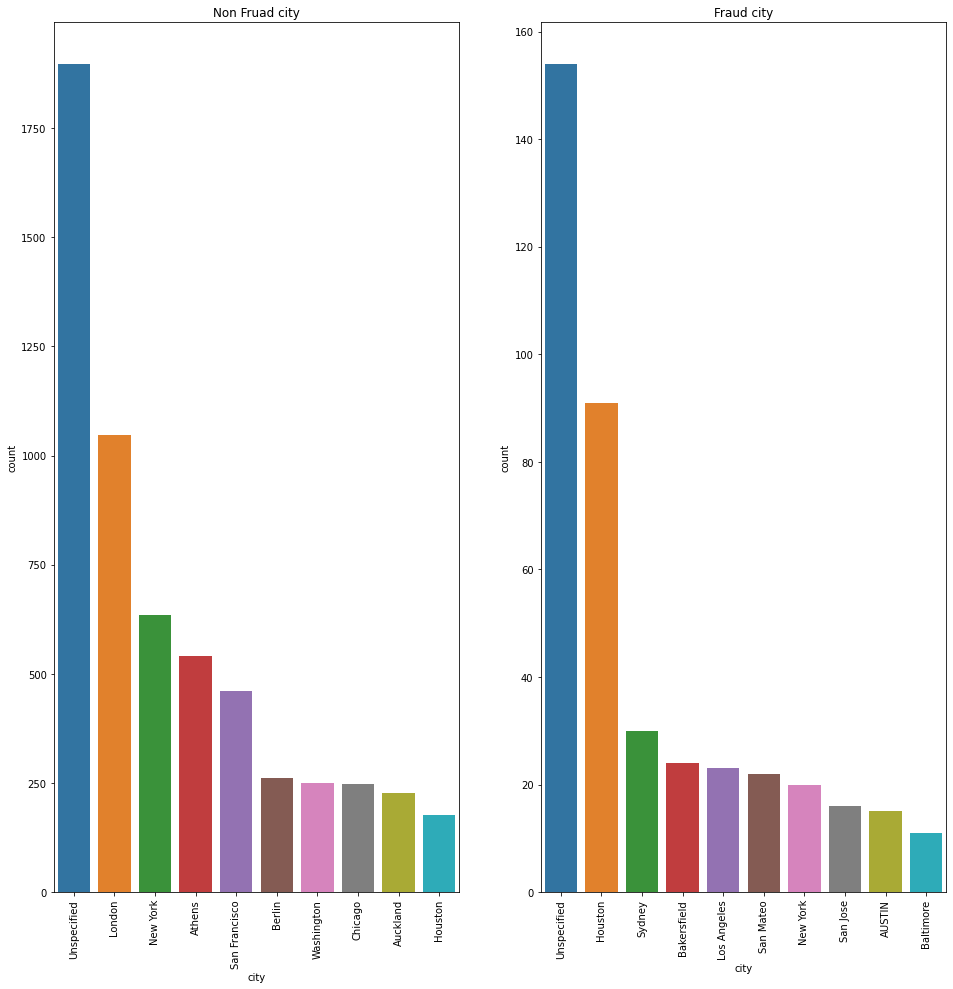

In [45]:
plot_bar(real, fake, "city", 10, True)

In [46]:
get_df(real, "city")[0:10]

,index,city,Percentage
0,Unspecified,1897,11.330108
1,London,1048,6.259332
2,New York,635,3.792630
3,Athens,540,3.225228
4,San Francisco,460,2.747417
5,Berlin,262,1.564833
6,Washington,251,1.499134
7,Chicago,247,1.475243
8,Auckland,226,1.349818
9,Houston,176,1.051186


In [47]:
get_df(fake, "city")[0:10]

,index,city,Percentage
0,Unspecified,154,17.990654
1,Houston,91,10.630841
2,Sydney,30,3.504673
3,Bakersfield,24,2.803738
4,Los Angeles,23,2.686916
5,San Mateo,22,2.570093
6,New York,20,2.336449
7,San Jose,16,1.869159
8,AUSTIN,15,1.752336
9,DALLAS,11,1.285047


Both fake and real job posting have a significant percentage for unspecified city. The counties that come after seems to defer for real and fake job posting. Therefore, `city` might influence the authenticity of the job posting.

### **Department** 

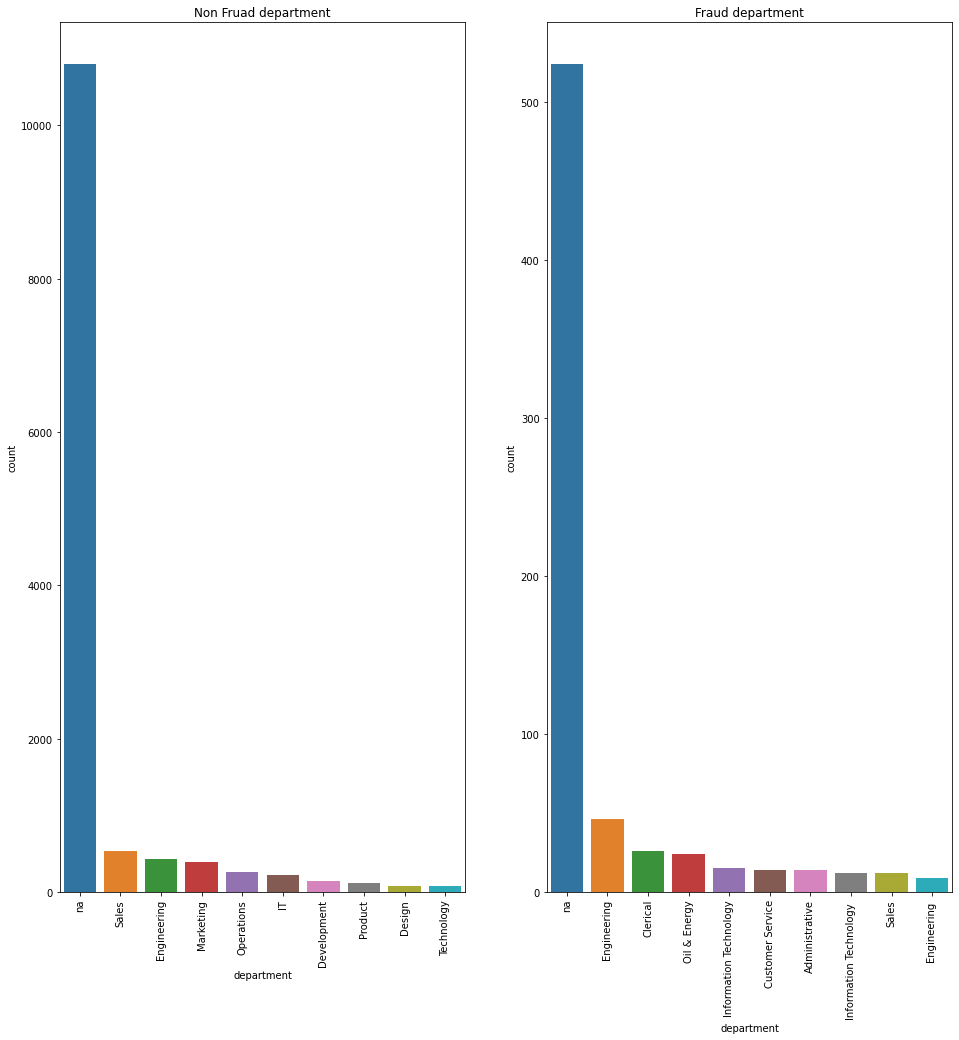

In [48]:
plot_bar(real, fake, "department", 10, True)

In [49]:
get_df(real, "department")[0:10]

,index,department,Percentage
0,na,10804,64.528460
1,Sales,529,3.159529
2,Engineering,437,2.610046
3,Marketing,395,2.359195
4,Operations,266,1.588724
5,IT,223,1.331900
6,Development,146,0.872006
7,Product,112,0.668936
8,Design,76,0.453921
9,Technology,74,0.441976


In [50]:
get_df(fake, "department")[0:10]

,index,department,Percentage
0,na,524,61.214953
1,Engineering,46,5.373832
2,Clerical,26,3.037383
3,Oil & Energy,24,2.803738
4,Information Technology,15,1.752336
5,Administrative,14,1.635514
6,Customer Service,14,1.635514
7,Sales,12,1.401869
8,Information Technology,12,1.401869
9,Engineering,9,1.051402


More than half of the departments are not specified in both real and fake job posting. The departments that come after also defer. 

### **Min Salary** 

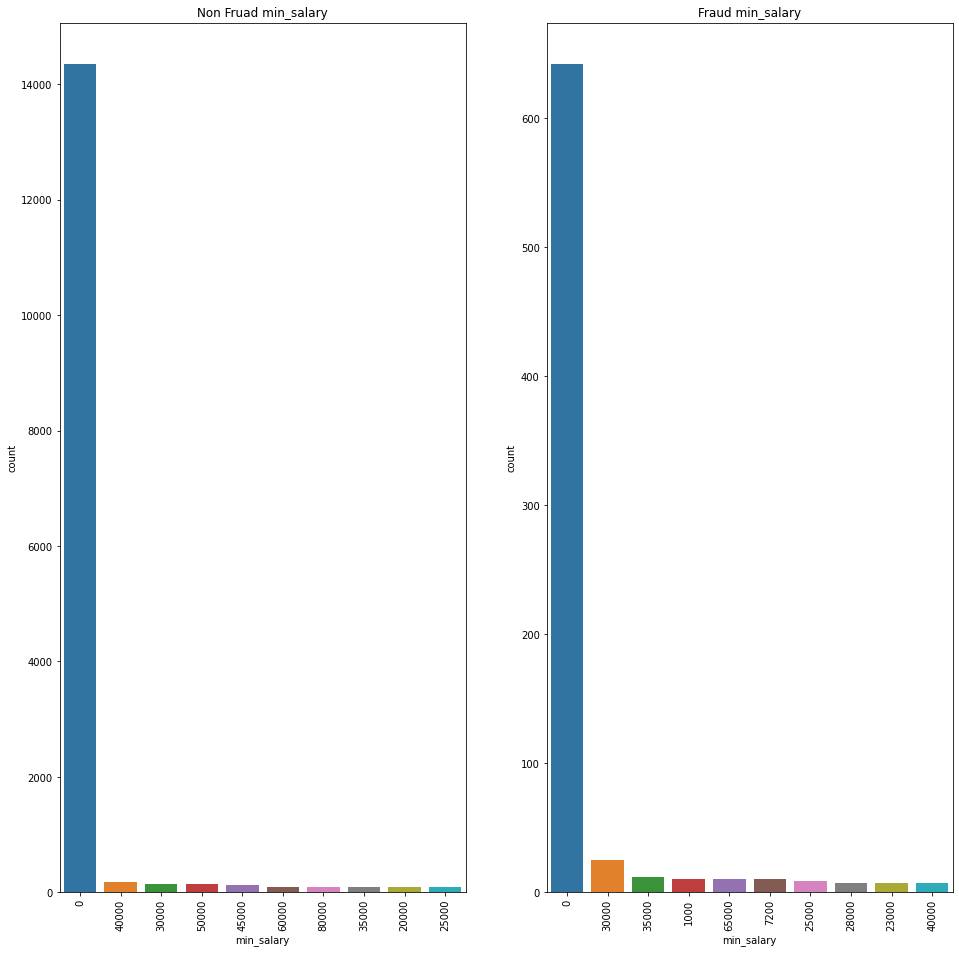

In [51]:
plot_bar(real, fake, "min_salary", 10, True)

In [52]:
get_df(real, "min_salary")[0:10]

,index,min_salary,Percentage
0,0,14349,85.701487
1,40000,187,1.116885
2,30000,153,0.913815
3,50000,142,0.848116
4,45000,123,0.734635
5,60000,99,0.591292
6,80000,96,0.573374
7,35000,93,0.555456
8,20000,91,0.543511
9,25000,87,0.519620


In [53]:
get_df(fake, "min_salary")[0:10]

,index,min_salary,Percentage
0,0,642,75.000000
1,30000,25,2.920561
2,35000,12,1.401869
3,1000,10,1.168224
4,65000,10,1.168224
5,7200,10,1.168224
6,25000,9,1.051402
7,28000,7,0.817757
8,40000,7,0.817757
9,250000,7,0.817757


More than half of the min salarry are 0 in both real and fake job posting. The min salarry that come after also defer. 

### **max_salary** 

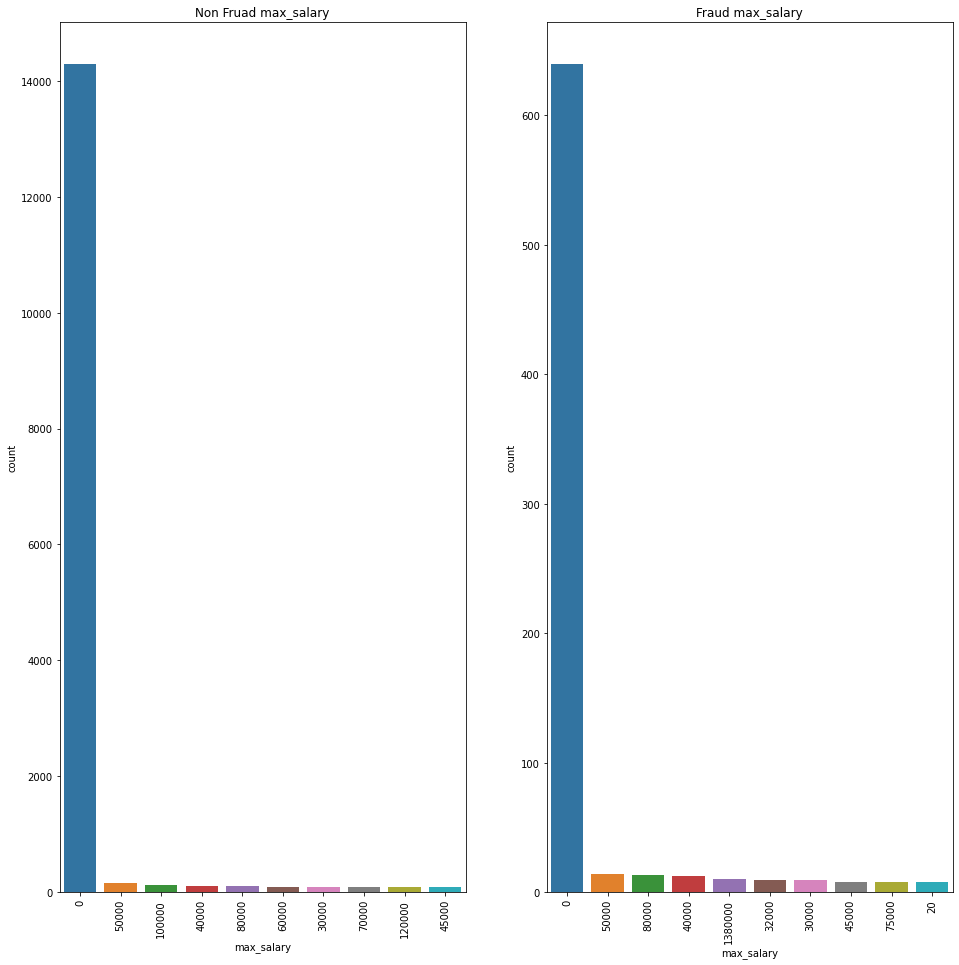

In [54]:
plot_bar(real, fake, "max_salary", 10, True)

In [55]:
get_df(real, "max_salary")[0:10]

,index,max_salary,Percentage
0,0,14298,85.396882
1,50000,153,0.913815
2,100000,119,0.710745
3,40000,102,0.609210
4,80000,98,0.585319
5,60000,92,0.549483
6,30000,91,0.543511
7,70000,88,0.525593
8,120000,87,0.519620
9,45000,83,0.495730


In [56]:
get_df(fake, "max_salary")[0:10]

,index,max_salary,Percentage
0,0,640,74.766355
1,50000,14,1.635514
2,80000,13,1.518692
3,40000,12,1.401869
4,1380000,10,1.168224
5,32000,9,1.051402
6,30000,9,1.051402
7,45000,8,0.934579
8,75000,8,0.934579
9,20,8,0.934579


More than half of the max salarry are 0 in both real and fake job posting. The max salarry that come after also defer. 

### **Employment type** 

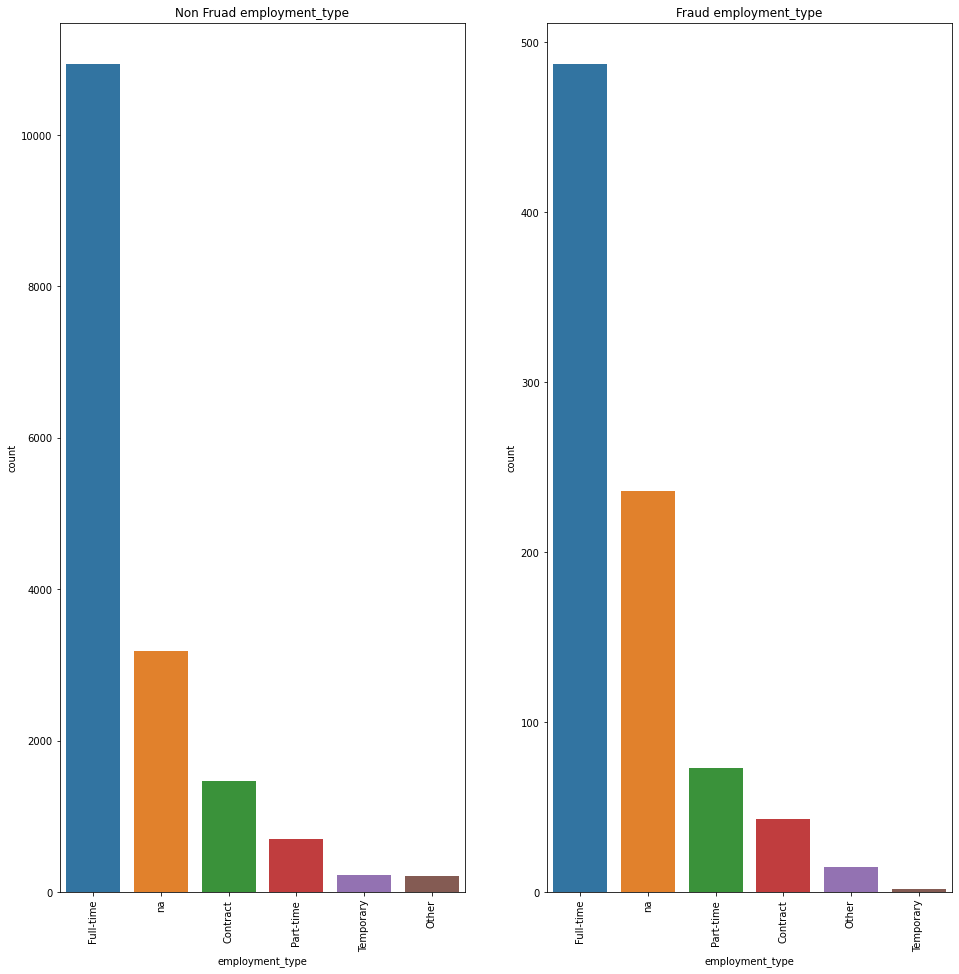

In [57]:
plot_bar(real, fake, "employment_type", 10, True)

In [58]:
get_df(real, "employment_type")[0:10]

,index,employment_type,Percentage
0,Full-time,10936,65.316849
1,na,3192,19.064684
2,Contract,1471,8.785761
3,Part-time,699,4.174879
4,Temporary,235,1.403572
5,Other,210,1.254256


In [59]:
get_df(fake, "employment_type")[0:10]

,index,employment_type,Percentage
0,Full-time,487,56.892523
1,na,236,27.570093
2,Part-time,73,8.528037
3,Contract,43,5.023364
4,Other,15,1.752336
5,Temporary,2,0.233645


The distribution for `employment_type` for both real and fake job posting are similar. 

### **Required Experience** 

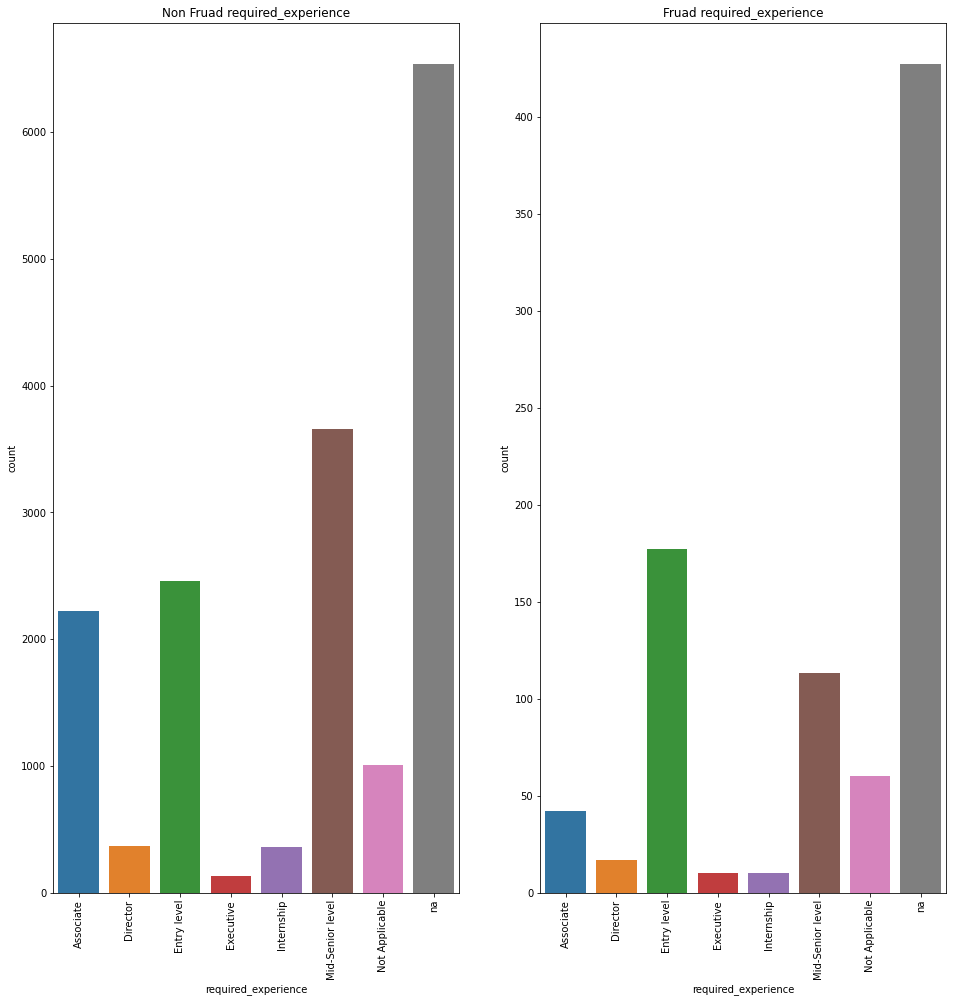

In [60]:
plot_bar(real, fake, "required_experience", 10, False)

In [61]:
get_df(real, "required_experience").sort_values(by=['index'])

,index,required_experience,Percentage
3,Associate,2225,13.289136
5,Director,366,2.185988
2,Entry level,2460,14.692707
7,Executive,130,0.776444
6,Internship,362,2.162098
1,Mid-Senior level,3655,21.830019
4,Not Applicable,1010,6.032372
0,na,6535,39.031237


In [62]:
get_df(fake, "required_experience").sort_values(by=['index'])

,index,required_experience,Percentage
4,Associate,42,4.906542
5,Director,17,1.985981
1,Entry level,177,20.677570
6,Executive,10,1.168224
7,Internship,10,1.168224
2,Mid-Senior level,113,13.200935
3,Not Applicable,60,7.009346
0,na,427,49.883178


The distribution for `required_experience` for both real and fake job posting are similar. 

### **Function** 

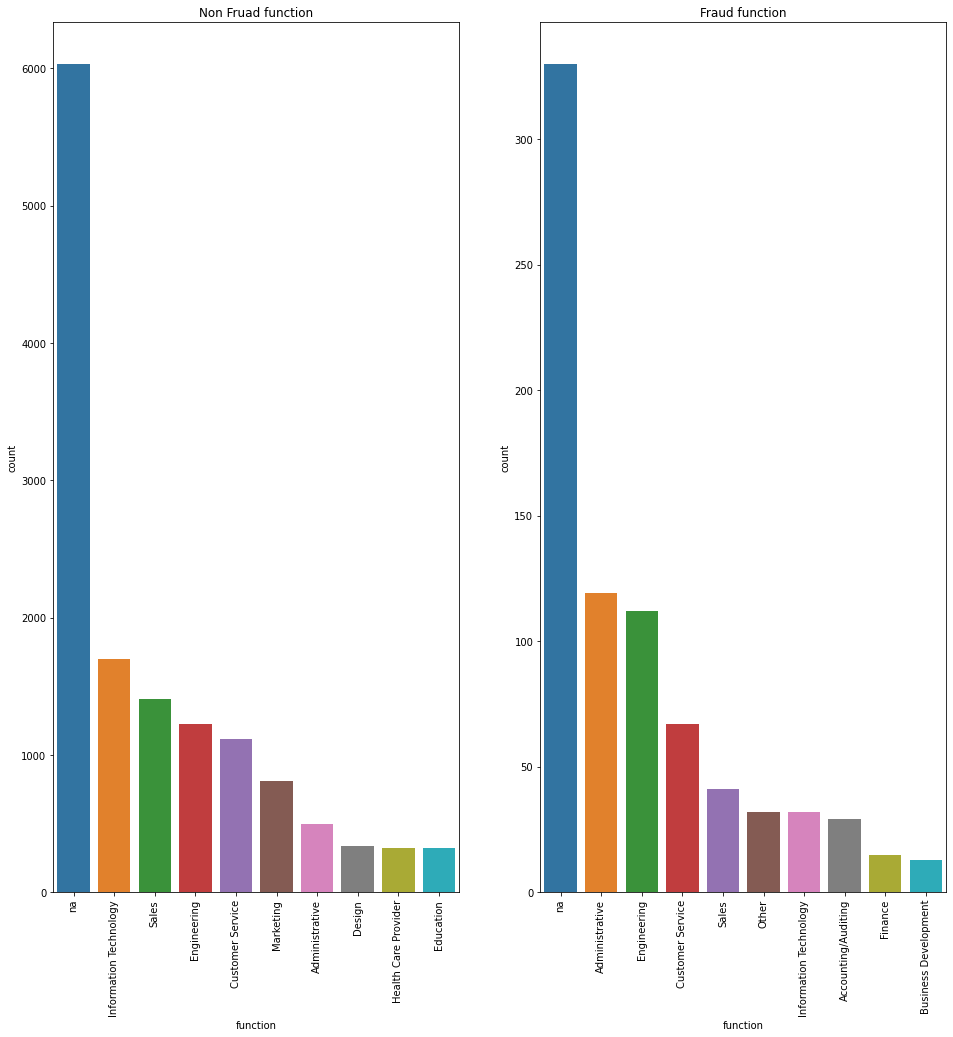

In [63]:
plot_bar(real, fake, "function", 10, True)

In [64]:
get_df(real, "function")[0:10]

,index,function,Percentage
0,na,6033,36.032969
1,Information Technology,1698,10.141552
2,Sales,1407,8.403512
3,Engineering,1227,7.328436
4,Customer Service,1113,6.647554
5,Marketing,808,4.825897
6,Administrative,494,2.950487
7,Design,333,1.988891
8,Health Care Provider,325,1.941110
9,Education,324,1.935137


In [65]:
get_df(fake, "function")[0:10]

,index,function,Percentage
0,na,330,38.551402
1,Administrative,119,13.901869
2,Engineering,112,13.084112
3,Customer Service,67,7.827103
4,Sales,41,4.789720
5,Other,32,3.738318
6,Information Technology,32,3.738318
7,Accounting/Auditing,29,3.387850
8,Finance,15,1.752336
9,Business Development,13,1.518692


Missing values in function occupies the highest percentage for both real and fake job posting. The job function defers after the missing values for both real and fake job posting. Hence `function` might have some influence on the authenticity of the job posting. 

### **Industry** 

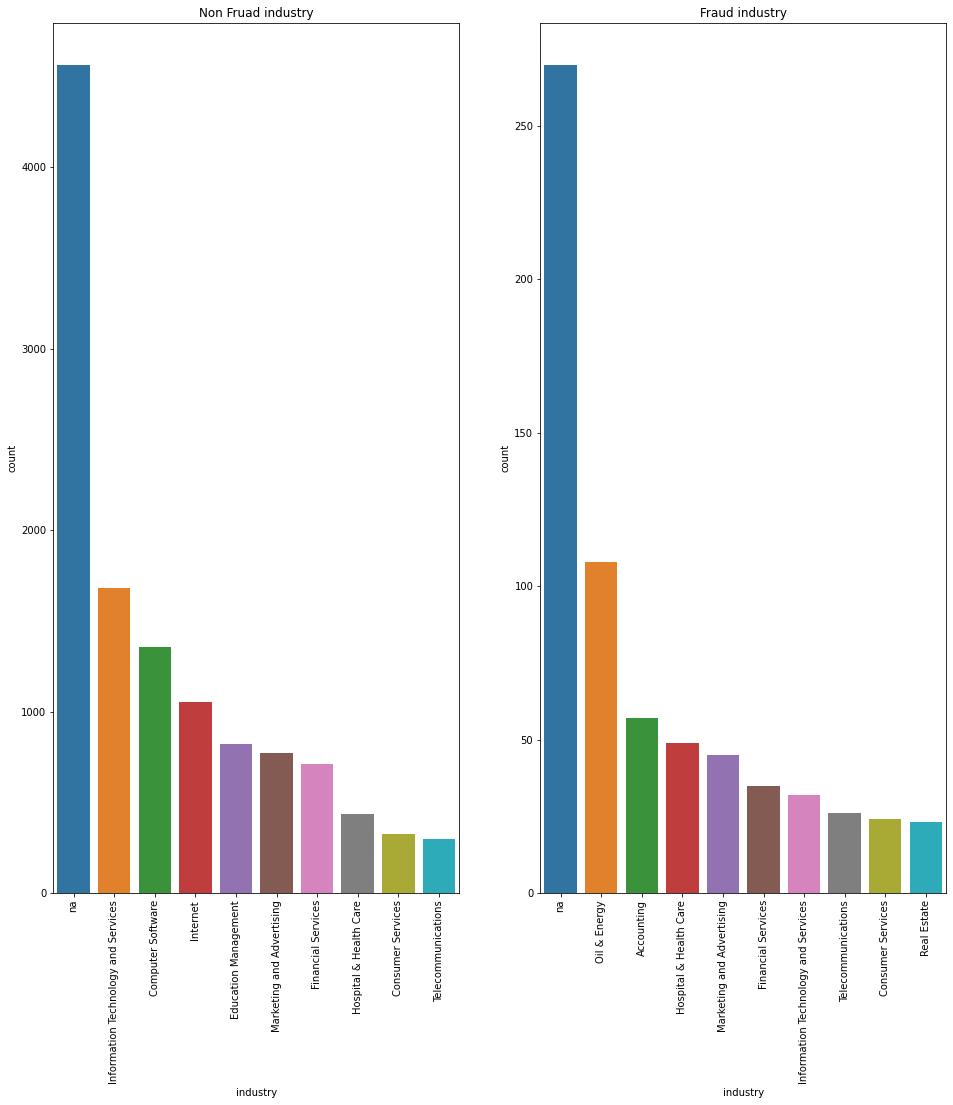

In [66]:
plot_bar(real, fake, "industry", 10, True)

In [67]:
get_df(real, "industry")[0:10]

,index,industry,Percentage
0,na,4567,27.277071
1,Information Technology and Services,1679,10.028071
2,Computer Software,1357,8.104880
3,Internet,1054,6.295168
4,Education Management,819,4.891596
5,Marketing and Advertising,773,4.616855
6,Financial Services,713,4.258496
7,Hospital & Health Care,434,2.592128
8,Consumer Services,324,1.935137
9,Telecommunications,300,1.791794


In [68]:
get_df(fake, "industry")[0:10]

,index,industry,Percentage
0,na,270,31.542056
1,Oil & Energy,108,12.616822
2,Accounting,57,6.658879
3,Hospital & Health Care,49,5.724299
4,Marketing and Advertising,45,5.257009
5,Financial Services,35,4.088785
6,Information Technology and Services,32,3.738318
7,Telecommunications,26,3.037383
8,Consumer Services,24,2.803738
9,Real Estate,23,2.686916


Both real and fake job posting have a significant percentage of missing values. The industries that come after "na" are vastly different from real and fake job posting. Therefore `industry` might play some importance in determining the authenticity of the job posting. 

# **Features for Machine Learning**

To summarise the observations above, the following characteristics will be used in building our model for fraud detection.


*   **Telecommuting :** postings that allow telecommuting are more likely to be fraud
*   **Company logo :** postings without company logos are more likely to be fraud
*   **Has questions :** postings without questions are more likely to be fraud
*   **Employment type :** postings with employment type being **"empty"** and **"part-time"** are more likely to be fraud
*   **Required experience :** postings with required experience being **not applicable**, **na**, **entry level**, **executive** and **director** are more likely to be fraud
*   **Required education :** postings that require **"Some high school education"** are disproportionately more likely to be fraud
*   **Department :** fraud postings are more likely to belong to the **"Engineering"** industry while non-fraud postings are more likely to belong to the **"Sales"** industry
*   **Industry :** fraud postings are more likely to belong to the **"Oil and energy"** industry while non-fraud postings are more likely to belong to the **"IT and services"** industry
*   **Salary range :** postings that specify values for salary are more likely to be fraud
*   **Presence of special phrases in text attributes :** fraud postings are more likely to include '$' in titles, and **emails** and **phone numbers** in text attributes.
*   **Length of text attributes such as company profile, description, requirements and benefits :** legitimate postings are more likely to have longer text as they are to find the most suitable candidate

